In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('risco_credito.csv')
df.head()

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


In [5]:
df['historia'].unique()

array(['ruim', 'desconhecida', 'boa', 'boa '], dtype=object)

In [9]:
x = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [10]:
x

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa ', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [11]:
y

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder = LabelEncoder()

In [16]:
x[:, 0] = label_encoder.fit_transform(x[:, 0])
x[:, 1] = label_encoder.fit_transform(x[:, 1])
x[:, 2] = label_encoder.fit_transform(x[:, 2])
x[:, 3] = label_encoder.fit_transform(x[:, 3])

In [17]:
x

array([[3, 0, 1, 0],
       [2, 0, 1, 1],
       [2, 1, 1, 1],
       [2, 1, 1, 2],
       [2, 1, 1, 2],
       [2, 1, 0, 2],
       [3, 1, 1, 0],
       [3, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [1, 0, 1, 2],
       [3, 0, 1, 1]], dtype=object)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

In [20]:
arvore_risco_credito.feature_importances_

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

In [21]:
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

In [23]:
import matplotlib.pyplot as plt
from sklearn import tree

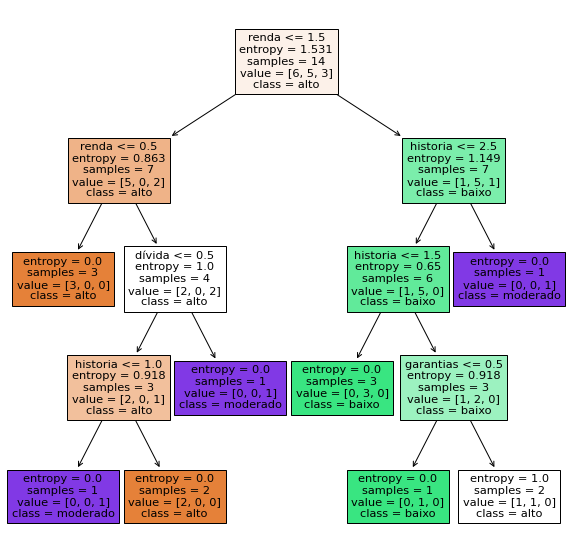

In [24]:
previsoes = ['historia', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsoes, class_names=arvore_risco_credito.classes_, filled=True);

In [25]:
previsoes = arvore_risco_credito.predict([[0,0,1,2]])
previsoes # risco

array(['baixo'], dtype=object)